# Wrangle WeRateDogs Data

This document contains the code that was used to wrangle the data for the Wrangle and Analyze Data project. I've divided the document into three sections corresponding to a step in the data wrangling process as outlined in the lessons:

 - Gather
 - Assess
 - Clean

## Gather

Here I begin the process of wrangling by gathering the required data. The only data that I didn't have to obtain elsewhere are the data contained in the file "twitter-archive-enhanced.csv" which was provided to me.

In [1]:
# Load all of the necessary libararies
import tweepy
import pandas as pd
import numpy as np
import os
import requests
import json
import collections
import functools

In [2]:
# Start by loading the twitter-archive-enhanced.csv file into a dataframe
tweet_data_archived = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
# Retrieve image-predictions.tsv file
image_pred_url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
with open('image-predictions.tsv', 'wb') as image_pred_file:
    image_pred_gathered = requests.get(image_pred_url)
    image_pred_file.write(image_pred_gathered.content)

# Load image prediction data into a dataframe
tweet_image_pred = pd.read_csv('image-predictions.tsv', delim_whitespace=True)

A brief note on the code below. This code can be run but since the file containing the api keys isn't included in the project submission for security reasons, the code is presented here for review purposes only. A reviewer is free to try this code using his/her own API keys. In order to include the API keys in the code, create a file called `credentials.py` with the following variables:
 - `consumer_key`: consumer API key
 - `consumer_secret`: consumer API secret key
 - `access_token`: access token
 - `access_token_secret`: access token secret

From this point on, assume that this code has been run and the file containing the gathered data is present in the current working directory.

In [ ]:
# Code for retrieving tweet data for each of the tweet ids contained in the WeRateDogs twitter
# archive.
import credentials as cred

# Create tweepy api object
auth = tweepy.OAuthHandler(cred.consumer_key, cred.consumer_secret)
auth.set_access_token(cred.access_token, cred.access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

# Get all of the tweet data for each tweet id
tweet_ids = pd.read_csv('twitter-archive-enhanced.csv').tweet_id.astype(str).tolist()
with open('tweet_json.txt', 'w') as tweet_data_file:
    for tweet_id in tweet_ids:
        try:
            tweet_data = api.get_status(tweet_id, tweet_mode='extended')
        except tweepy.TweepError:
            pass
        else:
            tweet_data_file.write(json.dumps(tweet_data._json) + '\n')
            print('Retrieved data for tweet id: {}'.format(tweet_id))
print('Retrieved data for all tweet ids.')

In [4]:
# Create a dataframe from the tweet data that we just retrieved.
tweet_data = []
with open('tweet_json.txt') as data_file:
    for json_obj in data_file:
        tweet_data_sub = collections.OrderedDict()
        tweet_data_all = json.loads(json_obj)

        # Get all of the data we're interested in
        tweet_data_sub['tweet_id'] = tweet_data_all['id']
        tweet_data_sub['retweet_count'] = tweet_data_all['retweet_count']
        tweet_data_sub['favorite_count'] = tweet_data_all['favorite_count']

        # Append it to the data gathering list
        tweet_data.append(tweet_data_sub)

# Create a dataframe from the data
tweet_data_extra = pd.DataFrame(tweet_data)

The data has now been loaded into the following dataframes:
 - `tweet_data_archived`: contains data about the archived WeRateDogs tweets.
 - `tweet_data_extra`: contains additional data about the WeRateDogs tweets gathered from Twitter.
 - `tweet_image_pred`: contains the prediction results of a machine learning algorithm trained on a sample of the images from the tweets in the WeRateDogs archive.

## Assess

With the data in hand I can now assess the data for potential quality and structural issues starting with visual assessment.

### Dataframe contents for visual assessment

In [5]:
# Display the twitter archive dataframe
tweet_data_archived

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


##### `tweet_data_archived` quality issues

Without even scrolling down, I can see an issue in the `source` column. There appear to be HTML tags surrounding the name of the device from which the tweet was made. Looking at the links in the tags, it seems that the tags would direct a user to download the user to the Twitter website to download the version of the app compatible with the device being used. This extra text isn't relevant to the information that I expect from this column which is the device used to send the tweet.

Scrolling around a bit, I can see that in the `name` column there are two issues. The first issue is that missing names are encoded as the string 'None'. This is slightly misleading and a potential source of confusion as some of the pandas methods used to detect missing values will report no missing values if called on this column and other methods used to assess data may give strange results. It would be better to just leave the missing names blank and write code deal with them appropriately later on when displaying this data or performing analyses on it. The second issue is that there appear to be words that are clearly not names in this column.

##### Quality issues summary
 - HTML tags in `source`
 - `name` contains words that are clearly not names
 - Missing data in `name` encoded as the string 'None'

##### `tweet_data_archived` tidiness issues

There are four columns in this dataframe indicating the type of dog depicted in the tweets with the following names: `doggo`, `floofer`, `pupper`, and `puppo`. These columns can actually be combined into a single column, `dog_types`, where multiple instances of a dog type, e.g., `doggo` and `puppo`, are expressed as a string with the words separated by commas.

##### Tidiness issues summary
 - One variable, the type of dog (e.g. `puppo`), spread over four columns

In [6]:
# Display the supplementary data dataframe
tweet_data_extra

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8426,38368
1,892177421306343426,6208,32881
2,891815181378084864,4107,24776
3,891689557279858688,8542,41710
4,891327558926688256,9280,39884
5,891087950875897856,3076,20018
6,890971913173991426,2044,11717
7,890729181411237888,18686,64781
8,890609185150312448,4220,27530
9,890240255349198849,7318,31592


##### `tweet_data_extra` quality issues

It would appear that there is no invalid data in either the `retweet_count` or `favorite_count` columns. There also doesn't appear to be any missing data in either of the aforementioned columns although in this case missing data would simply indicate a that a particular tweet was not retweeted or liked by other users as stated in the official Twitter documentation on tweet objects. Additionally, there don't seem to be any malformed or missing tweet IDs.

##### `tweet_data_extra` tidiness issues

Since this data is meant to augment the archived tweet data it would be prudent to add the `retweet_count` and `favorite_count` columns to the `tweet_data_archived`

##### Tidiness issues summary
 - `retweet_count` and `favorite_count` should be part of `tweet_data_archived`

In [7]:
# Display the image prediction results dataframe
tweet_image_pred

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


##### `tweet_image_pred` quality issues

I noticed that the predictions in the columns `p1`, `p2`, and `p3` contain underscores between each of the words that make up the name of the predicted item or dog breed. This is may not have been a problem during the training of the machine learning algorithm but for the purposes of displaying these predictions in an easy to read form it would be best to remove the underscores.

##### Quality issues summary
 - Words combined using underscore in `p1`, `p2`, and `p3`
 
##### `tweet_image_pred` tidiness issues

Since the `p*_dog` columns give information as to which predictions were correct, it would be beneficical to combine these correct predictions with the `tweet_data_archived` dataset. This would make it easier to identify the dog breed displayed in each tweet without having to resort to downloading the pictures from each tweet and performing the identification myself.

##### Tidiness issues summary
 - Correct predictions should be combined with `tweet_data_archived`

### Programmatic assessment

#### Dataframe structure

In [8]:
# Display the structure of the twitter archive dataframe
tweet_data_archived.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

##### `tweet_data_archived` quality issues 

Here it's obvious that the datatypes that pandas inferred for several of the columns are incorrect. Since IDs are used primarily to differentiate objects from each other, it would be better if all of the ID columns in this dataframe were converted to strings instead of integers or floats. That way I don't inadvertently perform any sort of mathematical operation on them. The `timestamp` and `retweeted_status_timestamp` columns have erroneously been given the object datatype instead of the datetime datatype.

There are non-null values in all of the `retweeted*` columns. Since one of the requirements of this project is for there to be no retweets in the archived tweet data the rows containing these values will need to be removed. It also would appear that there is missing data in the columns dealing with replies made by the WeRateDogs account (`in_reply*`). Here, the missing data is simply due to the nature of the Twitter platform. Any missing data in these columns is due to the fact that these tweets made by the WeRateDogs account aren't replies to another user's tweet. For these reasons I won't include the missing data as quality issues.

##### Quality issues summary
 - Erroneous datatypes (`*_id`, `*timestamp`)
 - `tweet_data_archived` contains retweets

In [9]:
# Display the structure of the supplementary data dataframe
tweet_data_extra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2340 entries, 0 to 2339
Data columns (total 3 columns):
tweet_id          2340 non-null int64
retweet_count     2340 non-null int64
favorite_count    2340 non-null int64
dtypes: int64(3)
memory usage: 54.9 KB


##### `tweet_data_extra` quality issues

Comparing the number of entries in this dataframe to the number of entries in the `tweet_data_archived` dataframe, there would appear to be missing data. The most likely cause is that, at the time the data was extracted, some of the tweets in the archive have since been deleted. There is really nothing I can do to retrieve the data and I feel that using some other method of making up for the lost data isn't really necessary considering the amount of missing data is very small relative to the total number of tweets contained in the archive. Thus, I won't be including the missing data as a quality issue. Besides the missing data, the only other noticable issue is the incorrect datatype inferred for the `tweet_id` column.

##### Quality issues summary
 - Erroneous datatype for `tweet_id` column

In [10]:
# Display the structure of the image prediction results dataframe
tweet_image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


##### `tweet_image_pred` quality issues

All of the columns appear to be of the correct datatype. The only quality issue in this dataframe is that of missing data. If I compare the number of entries in this dataframe to the number of entries in the `tweet_data_archived` dataframe there is a disparity that indicates missing data. Due to the nature of training machine learning algorithms, it's likely that a sample of tweets from the archive was used rather than the entire archive. As with the missing data in the `tweet_data_extra` dataframe, there is really nothing I can do about the missing data. However, the sample appears to be large enough for patterns to emerge and for use in statistical analyses. For this reason I will not be including the missing data as a quality issue.

#### Duplicate data

Here I check for duplicate data. I'm mostly concerned with duplicate rows as well as duplicate tweet IDs.

In [11]:
# Check for duplicate rows and tweet ids in each dataframe
dataframes = [tweet_data_archived, tweet_data_extra, tweet_image_pred]
dataframe_names = ['tweet_data_archived', 'tweet_data_extra', 'tweet_image_pred']

for df_name, df in zip(dataframe_names, dataframes):
    dataframe_dup_rows = df.duplicated().sum()
    dataframe_dup_ids = df.duplicated('tweet_id').sum()
    
    print(df_name)
    print('-' * len(df_name) + '\n')
    print('Number of duplicate rows: {}'. format(dataframe_dup_rows))
    print('Number of duplicate tweet IDs: {}\n'.format(dataframe_dup_ids))

tweet_data_archived
-------------------

Number of duplicate rows: 0
Number of duplicate tweet IDs: 0

tweet_data_extra
----------------

Number of duplicate rows: 0
Number of duplicate tweet IDs: 0

tweet_image_pred
----------------

Number of duplicate rows: 0
Number of duplicate tweet IDs: 0



There don't appear to be any duplicated rows or tweet IDs in the `tweet_data_archived`, `tweet_data_extra`, or `tweet_image_pred` dataframes.

#### Invalid or inaccurate data

I then check for invalid or inaccurate data by first computing basic stats on the columns in each dataframe for which it makes sense to do so.

In [12]:
# Compute basic stats on rating_numerator and rating_denominator columns in tweet_data_archived
tweet_data_archived[['rating_numerator', 'rating_denominator']].describe()

,rating_numerator,rating_denominator
count,2356.000000,2356.000000
mean,13.126486,10.455433
std,45.876648,6.745237
min,0.000000,0.000000
25%,10.000000,10.000000
50%,11.000000,10.000000
75%,12.000000,10.000000
max,1776.000000,170.000000


##### `tweet_data_archived` quality issues

For the `tweet_data_archived` dataframe, it's quite apparent that there are some absurdly large values even for the WeRateDogs rating system. Before I examine this in greater detail the minimum value of 0 in the `rating_denominator` column must be pointed out. This is an invalid value according to the schema of the _**WeRateDogs**_ data.

In [13]:
# Get of tweet with rating_denominator value of 0
invalid_tweet_text = tweet_data_archived.loc[tweet_data_archived.rating_denominator == 0, 'text'].tolist()[0]
print(invalid_tweet_text)

@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho


The text of the tweet reveals that the _**WeRateDogs**_ account has provided an alternative rating that is both valid and in line with the rating system. Based on this tweet, there are likely to be more errors like this one where there are two ratings given in the tweet and the method used to extract the numerator and denominator of the ratings only does so for the first rating. In these cases determining the correct rating may not be as clear cut as the tweet shown here.

Continuing my exploration of the ratings columns, I'll take a random sample of entries from the `text` column to see whether or not this is a common occurrence.

In [14]:
# Get a random sample of 25 entries from the text column
text_sample = tweet_data_archived.sample(25, random_state=12).text
text_sample_size = text_sample.size - 1
for i, entry in enumerate(text_sample):
    print(entry)
    if i != text_sample_size:
        print('----------')

This is CeCe. She's patiently waiting for Santa. 10/10 https://t.co/ZJUypFFwvg
----------
This is Beemo. He's a Chubberflop mix. 12/10 would cross the world for https://t.co/kzMVMU8HBV
----------
Touching scene here. Really stirs up the emotions. The bond between father &amp; son. So beautiful. 10/10 for both pups https://t.co/AJWJHov5gx
----------
This is Dave. He's currently in a predicament. Doesn't seem to mind tho. 12/10 someone assist Dave https://t.co/nfprKAXqwu
----------
This is Toby. A cat got his tongue. 13/10 adorable af https://t.co/fHQrBKYSLC
----------
This is Buddy. He's photogenic af. Loves to sexily exit pond. Very striped. Comes with shield. 8/10 would pet well https://t.co/mYhQvAdV4f
----------
This is Bo. He's going to make me cry. 13/10 please get off the bus for him Carly https://t.co/U7FvBZo6Bq
----------
RT @dog_rates: Please only send in dogs. We only rate dogs, not seemingly heartbroken ewoks. Thank you... still 10/10 would console https:/…
----------
Here we

Judging from this sample, it looks like these extremely large numerator and denominator values are likely to be quite rare. I can verify this by getting frequency counts of all of the values contained in both the `rating_numerator` and `rating_denominator` columns.

In [15]:
# Get value counts of rating_numerator column
tweet_data_archived.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [16]:
# Get value counts of rating denominator column
tweet_data_archived.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

The value counts show that extremely large values in the `rating_numerator` and `rating_denominator` columns are indeed rare which supports what I observed from the sample. Looking at the sample again, there is an entry that simply states that the account _**docmisterio**_ was created on 11/15/15.

In [17]:
# Display ratings corresponding to entry containing date
text_sample_mask = text_sample.str.contains('account')
junk_tweet_id = text_sample[text_sample_mask].index[0]
tweet_data_archived.iloc[junk_tweet_id][['rating_numerator', 'rating_denominator']]

rating_numerator      11
rating_denominator    15
Name: 342, dtype: object

The ratings associated with this tweet seem to have come from the first two numbers of the date contained in the tweet. This is another indication that the method used to extract the ratings from the text of the tweets was rather basic and didn't take cases like the presence of dates or  multiple scores into account. It's likely that there are more errors like this in the `tweet_data_archived` dataframe.

In [18]:
# Display the entire row of tweet containing junk data
tweet_data_archived.iloc[junk_tweet_id]

tweet_id                                                     832088576586297345
in_reply_to_status_id                                               8.32088e+17
in_reply_to_user_id                                                 3.05821e+07
timestamp                                             2017-02-16 04:45:50 +0000
source                        <a href="http://twitter.com/download/iphone" r...
text                                   @docmisterio account started on 11/15/15
retweeted_status_id                                                         NaN
retweeted_status_user_id                                                    NaN
retweeted_status_timestamp                                                  NaN
expanded_urls                                                               NaN
rating_numerator                                                             11
rating_denominator                                                           15
name                                    

Here, it's clear that this tweet doesn't actually contain any useful data and is essentially a "junk tweet" which can safely be removed from the `tweet_data_archived` dataframe along with other occurrences that I may encounter.

##### Quality issues summary
 - Some values in `rating_numerator` and `rating_denominator` taken from dates or, in the case of multiple scores, the wrong score
 - Single instance of 0 in `rating_denominator`
 - Some tweets don't contain useful data

In [19]:
# Compute basic stats on retweet_count and favorite_count columns in tweet_data_extra
tweet_data_extra[['retweet_count', 'favorite_count']].describe()

,retweet_count,favorite_count
count,2340.000000,2340.000000
mean,2966.939744,8021.265812
std,4980.602847,12382.653923
min,0.000000,0.000000
25%,596.750000,1390.000000
50%,1384.000000,3500.500000
75%,3461.500000,9851.250000
max,84496.000000,164963.000000


##### `tweet_data_extra` quality issues

Based on the basic statistics computed for the the `retweet_count` and `favorite_count` columns there don't appear to be any invalid values. Even the very large maximum values fit within the schema of the _**WeRateDogs**_ data as, at the time the tweets were made, the _**WeRateDogs**_ account had around 7.28 million followers and the upper limit for retweet and favorite counts for each tweet are likely the same as the one imposed for the integer datatype in the database used by Twitter which, for most databases, is quite large even for signed integers.

In [20]:
# Compute basic stats on the p*_conf columns of tweet_image_pred
tweet_image_pred[['img_num', 'p1_conf', 'p2_conf', 'p3_conf']].describe()

,img_num,p1_conf,p2_conf,p3_conf
count,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,1.203855,0.594548,1.345886e-01,6.032417e-02
std,0.561875,0.271174,1.006657e-01,5.090593e-02
min,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,1.000000,0.843855,1.955655e-01,9.180755e-02
max,4.000000,1.000000,4.880140e-01,2.734190e-01


##### `tweet_image_pred` quality issues

It would seem that there is no invalid data in any of the prediction confidence columns. All of the quartiles, the minimum, and the maximum values for each column fall squarely within the interval ${[0, 1]}$. This is in line with my expectations given that the values in these columns are probabilities. The `img_num` column appears to contain valid data as well as it can be seen from the minumum value that there are no negative numbers.

In [21]:
# Check for strange characters and explicit 'None', 'NA', or 'N/A' encodings in the predicitons columns
# of tweet_image_pred
for col in ['p1', 'p2', 'p3']:
    match_mask = tweet_image_pred[col].str.match('(.*[^\'\w-].*|n(?:/?a|one)$)', case=False)
    matches = tweet_image_pred[col].loc[match_mask]
    if matches.empty:
        print('There were no matches for column \'{}\''.format(col))
    else:
        print('There were matches for column \'{}\''.format(col))

There were no matches for column 'p1'
There were no matches for column 'p2'
There were no matches for column 'p3'


There doesn't appear to be any characters that aren't letters, underscores, hyphens, or apostrophes in any of the prediction columns. There also aren't any explicitly encoded 'None', 'NA', or 'N/A' strings like there were in the `name` column of the `tweet_data_archived` dataframe.

### Summary of quality and tidiness issues

Here I've listed all of the quality and tidiness issues I found in the `tweet_data_archived`, `tweet_data_extra`, and `tweet_image_pred` dataframes.

#### Quality

##### `tweet_data_archived`
 - HTML tags in `source`
 - `name` contains words that are clearly not names
 - Missing data in `name` encoded as the string 'None'
 - Erroneous datatypes (`*_id`, `*timestamp`)
 - `tweet_data_archived` contains retweets
 - Some values in `rating_numerator` and `rating_denominator` taken from dates or, in the case of multiple scores, the wrong score
 - Single instance of 0 in `rating_denominator`
 - Some tweets don't contain useful data
 
##### `tweet_data_extra`
 - Erroneous datatype for `tweet_id` column

##### `tweet_image_pred`
 - Erroneous datatypes (`tweet_id`)
 - Words combined using underscore in `p1`, `p2`, and `p3`

#### Tidiness

##### `tweet_data_archived`
 - One variable, the type of dog (e.g. `puppo`), spread over four columns

##### `tweet_data_extra`
 - `retweet_count` and `favorite_count` should be part of `tweet_data_archived`
 
##### `tweet_image_pred`
 - Correct predictions should be combined with `tweet_data_archived`

## Clean

After having assessed the data for quality and tidiness issues I can now clean the data. I'll start by creating copies of each dataframe

In [22]:
# Create copies of the tweet_data_archived, tweet_data_extra and tweet_image_pred dataframes
tweet_data_archived_clean = tweet_data_archived.copy()
tweet_data_extra_clean = tweet_data_extra.copy()
tweet_image_pred_clean = tweet_image_pred.copy()

### Junk data

#### `tweet_data_archived`: some tweets don't contain useful data

##### Define

Remove all rows that contain a string in the `text` column with the form `@user account started on MM/DD/YY` and reset the index of `tweet_data_archived`

##### Code

In [23]:
junk_data_mask = tweet_data_archived_clean.text.str.match('@.*account started.*\d{2}/\d{2}/\d{2}')
tweet_data_archived_clean = tweet_data_archived_clean[~junk_data_mask]
tweet_data_archived_clean.reset_index(drop=True, inplace=True)

##### Test

In [24]:
clean_data_mask = tweet_data_archived_clean.text.str.match('@.*account started.*\d{2}/\d{2}/\d{2}')
clean_data_matches = tweet_data_archived_clean.text.loc[clean_data_mask]
print('Number of rows matching the regex: {}'.format(clean_data_matches.sum()))

Number of rows matching the regex: 0


### Tidiness

#### `tweet_data_archived`: one variable, the type of dog (e.g. `puppo`), spread over four columns

##### Define 

Combine the `doggo`, `floofer`, `pupper`, and `puppo` columns into a single column called `dog_type` before dropping them. All 'None' strings will be converted to NaNs.

##### Code

In [25]:
# Replace None strings with empty strings
dog_type_cols = ['doggo', 'floofer', 'pupper', 'puppo']
tweet_data_archived_clean[dog_type_cols] = tweet_data_archived_clean[dog_type_cols].replace('None', '')

# Combine columns and convert empty strings to NaN
dog_type_col_data = [tweet_data_archived_clean[col] for col in dog_type_cols]
tweet_data_archived_clean['dog_type'] = functools.reduce(lambda col_main, col_add: col_main.str.cat(col_add, ', '), dog_type_col_data)
tweet_data_archived_clean['dog_type'] = tweet_data_archived_clean['dog_type'].str.strip(', ')
tweet_data_archived_clean['dog_type'] = tweet_data_archived_clean['dog_type'].apply(lambda x: x.replace(', ', '', x.count(',')-1))
tweet_data_archived_clean['dog_type'] = tweet_data_archived_clean['dog_type'].replace('', np.nan)

# Drop columns
tweet_data_archived_clean = tweet_data_archived_clean.drop(columns=dog_type_cols)

##### Test

In [26]:
# Check columns and datatype
tweet_data_archived_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2355 entries, 0 to 2354
Data columns (total 14 columns):
tweet_id                      2355 non-null int64
in_reply_to_status_id         77 non-null float64
in_reply_to_user_id           77 non-null float64
timestamp                     2355 non-null object
source                        2355 non-null object
text                          2355 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2355 non-null int64
rating_denominator            2355 non-null int64
name                          2355 non-null object
dog_type                      380 non-null object
dtypes: float64(4), int64(3), object(7)
memory usage: 257.7+ KB


In [27]:
# Check that dog_type column contains correct values
tweet_data_archived_clean.dog_type.value_counts()

pupper            245
doggo              83
puppo              29
doggo, pupper      12
floofer             9
doggo, puppo        1
doggo, floofer      1
Name: dog_type, dtype: int64

#### `tweet_data_extra`: `retweet_count` and `favorite_count` should be part of `tweet_data_archived`

##### Define

Merge `tweet_data_archived` and `tweet_data_extra` on `tweet_id` column.

##### Code

In [28]:
tweet_data_archived_clean = pd.merge(tweet_data_archived_clean,
                                     tweet_data_extra_clean,
                                     how='left',
                                     on='tweet_id')

##### Test

In [29]:
tweet_data_archived_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_type,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,8426.0,38368.0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,6208.0,32881.0
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,4107.0,24776.0
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,8542.0,41710.0
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,9280.0,39884.0


#### `tweet_image_pred`: correct predictions should be combined with `tweet_data_archived`

##### Define

Extract the correct predictions from each prediction variable in such a way as to prefer the first prediction and combine these predictions with `tweet_data_archived`.

##### Code

In [30]:
# Extract all of the correct predictions
image_pred_cols = tweet_image_pred_clean.columns.tolist()
pred_col_pairs = [[image_pred_cols[i], image_pred_cols[i+2]] for i in
                  range(3, len(image_pred_cols), 3)]

dog_breeds_partial = []
for pred_col_pair in pred_col_pairs:
    p, p_dog = pred_col_pair
    tmp_pred = tweet_image_pred_clean.loc[tweet_image_pred_clean[p_dog] == True, ['tweet_id', p]]                                                        
    dog_breeds_partial.append(tmp_pred.rename(columns={p: 'dog_breed'}))
dog_breeds = pd.concat(dog_breeds_partial, ignore_index=True, sort=True)

# Combine correct predictions with tweet_data_archived
dog_breeds.drop_duplicates('tweet_id', inplace=True)
tweet_data_archived_clean = pd.merge(tweet_data_archived_clean, dog_breeds, on='tweet_id', how='left')

##### Test

In [31]:
tweet_data_archived_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_type,retweet_count,favorite_count,dog_breed
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,8426.0,38368.0,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,6208.0,32881.0,Chihuahua
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,4107.0,24776.0,Chihuahua
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,8542.0,41710.0,Labrador_retriever
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,9280.0,39884.0,basset


### Quality

#### `tweet_data_archived_clean`: erroneous datatypes (`*_id`, `*timestamp`)

##### Define

Convert each of the ID columns into strings and convert the timestamp columns into datetime.

##### Code

In [32]:
# Change id columns to string
id_col_names = [t_id for t_id in tweet_data_archived_clean.columns.tolist() if 'id' in t_id]
for id_col_name in id_col_names:
    if tweet_data_archived_clean[id_col_name].dtype == 'float64':
        tweet_data_archived_clean[id_col_name] = tweet_data_archived_clean[id_col_name].fillna(0)
        tweet_data_archived_clean[id_col_name] = tweet_data_archived_clean[id_col_name].astype(int)
    tweet_data_archived_clean[id_col_name] = tweet_data_archived_clean[id_col_name].astype(str)
    tweet_data_archived_clean[id_col_name] = tweet_data_archived_clean[id_col_name].replace('0', np.nan)

# Change timestamp columns to datetime
ts_col_names = [t_ts for t_ts in tweet_data_archived_clean.columns.tolist() if 'timestamp' in t_ts]
for ts_col_name in ts_col_names:
    tweet_data_archived_clean[ts_col_name] = pd.to_datetime(tweet_data_archived_clean[ts_col_name])

##### Test

In [33]:
tweet_data_archived_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2355 entries, 0 to 2354
Data columns (total 17 columns):
tweet_id                      2355 non-null object
in_reply_to_status_id         77 non-null object
in_reply_to_user_id           77 non-null object
timestamp                     2355 non-null datetime64[ns]
source                        2355 non-null object
text                          2355 non-null object
retweeted_status_id           181 non-null object
retweeted_status_user_id      181 non-null object
retweeted_status_timestamp    181 non-null datetime64[ns]
expanded_urls                 2297 non-null object
rating_numerator              2355 non-null int64
rating_denominator            2355 non-null int64
name                          2355 non-null object
dog_type                      380 non-null object
retweet_count                 2339 non-null float64
favorite_count                2339 non-null float64
dog_breed                     1751 non-null object
dtypes: datetime64

#### `tweet_data_archived` contains retweets

##### Define

Remove all rows where `retweeted_status_id`. This will also take care of `retweeted_status_user_id` and `retweeted_status_timestamp` as both of these columns have values in the same rows as `retweeted_status_id`. Afterwards, reset the index.

##### Code

In [34]:
retweeted_cols = ['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp']
retweeted_mask = tweet_data_archived_clean.retweeted_status_id.notnull()

tweet_data_archived_clean = tweet_data_archived_clean[~retweeted_mask]
tweet_data_archived_retweet_test = tweet_data_archived_clean.copy() # For testing
tweet_data_archived_clean.drop(columns=retweeted_cols, inplace=True)
tweet_data_archived_clean.reset_index(drop=True, inplace=True)

##### Test

In [35]:
# Make sure we deleted all of the retweets
tweet_data_archived_retweet_test.retweeted_status_id.notnull().sum()

0

In [36]:
# Make sure we removed all of the retweet columns
tweet_data_archived_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type,retweet_count,favorite_count,dog_breed
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,8426.0,38368.0,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,6208.0,32881.0,Chihuahua
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,4107.0,24776.0,Chihuahua
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,8542.0,41710.0,Labrador_retriever
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,9280.0,39884.0,basset


#### `tweet_data_archived`: `name` column contains words that are clearly not names

##### Define

Search for lowercase words in `name` column. In these rows extract the name of the dog by searching for the word 'name' and the string 'That is' in the text column. Replace the word with the names of the dogs. For the other rows without dog names set the word to NaN.

##### Code

In [37]:
# Get names by using a pattern with 'name'
new_names_n = (tweet_data_archived_clean.text
                  .str.extract('name(?:d| is) (?P<real_name>[A-Z].*?)(?:\s|\.)'))

# Get names by using a pattern with 'That is'
new_names_t = (tweet_data_archived_clean.text
                  .str.extract('That is (?P<real_name>.*?)\.'))
                  
# Replace all strings with lowercase words with NaN
names_nan_mask = tweet_data_archived_clean.name.str.contains('^[a-z]')
tweet_data_archived_clean.loc[names_nan_mask, 'name'] = np.nan
                  
# Combine new names columns with existing names column
tweet_data_archived_clean['name'] = functools.reduce(lambda c_main, c_add: c_main.combine_first(c_add),
                                                     [tweet_data_archived_clean['name'],
                                                      new_names_n['real_name'],
                                                      new_names_t['real_name']])

##### Test

In [38]:
tweet_data_archived_clean.loc[names_nan_mask, 'name']

21            NaN
53            NaN
147           NaN
167           NaN
282           NaN
309           NaN
449           NaN
523           NaN
646           NaN
661           NaN
688          Zoey
752           NaN
812           NaN
816        Quizno
817           NaN
826           NaN
828           NaN
840           NaN
847           NaN
853           NaN
862           NaN
870           NaN
884           NaN
892           NaN
916           NaN
918           NaN
941           NaN
942           NaN
959           NaN
1014          NaN
          ...    
2011        Leroi
2018          NaN
2024        Berta
2031          NaN
2032          NaN
2038         Chuk
2042          NaN
2055      Alfonso
2069       Cheryl
2075      Jessiga
2082        Klint
2091         Kohl
2105        Daryl
2122         Pepe
2129    Octaviath
2132         Johm
2144          NaN
2145          NaN
2151          NaN
2152          NaN
2153          NaN
2163          NaN
2164          NaN
2165          NaN
2166      

#### `tweet_data_archived`: missing data in `name` encoded as the string 'None'

##### Define

Replace all instances of the string 'None' with NaN.

##### Code

In [39]:
tweet_data_archived_clean.name = tweet_data_archived_clean.name.replace('None', np.nan)

##### Test

In [40]:
tweet_data_archived_clean.name.loc[tweet_data_archived_clean.name == 'None'].sum()

0

#### `tweet_data_archived`: HTML tags in `source` column

##### Define

Extract the name of the source platform from the HTML tags and replace the original values of the `source` column with them.

##### Code

In [41]:
platform_names = (tweet_data_archived_clean.source.str.extract('>(.*?)<')
                  .rename(columns={0: 'platform_name'}))
tweet_data_archived_clean['source'] = platform_names

##### Test

In [42]:
tweet_data_archived_clean.source.value_counts()

Twitter for iPhone     2041
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

#### `tweet_data_archived`: Some values in `rating_numerator` and `rating_denominator` taken from dates or, in the case of multiple scores, the wrong score.

##### Define

Find tweets with dates and multiple scores. For the tweets with dates, look for scores surrounding the dates and extract them. For the tweets with multiple scores, extract the first one but be mindful of the presence of numbers with decimal points in the numerator.

##### Code

In [43]:
# Look for dates
date_chk_pattern = '\d{1,2}/\d{1,2}/\d{1,2}'
date_ext_pattern_front = '(\d{1,3}(?:\.\d{1,3})?)/(\d{1,3}).*?' + date_chk_pattern
date_ext_pattern_back = date_chk_pattern + '.*?(\d{1,3}(?:\.\d{1,3})?)/(\d{1,3})'

# Performing this check since the junk tweets removed previously may have been the only
# rows with a date in the text column
col_names = ['rating_numerator', 'rating_denominator']
new_col_names = {0: 'rating_numerator', 1: 'rating_denominator'}
if tweet_data_archived_clean.text.str.contains(date_chk_pattern).sum():
    # Extract scores
    front_scores = (tweet_data_archived_clean.text.str.extract(date_ext_pattern_front)
                    .rename(columns=new_col_names))
    back_scores = (tweet_data_archived_clean.text.str.extract(date_ext_pattern_back)
                   .rename(columns=new_col_names))
    
    # Get masks
    front_score_mask = front_score.rating_numerator.notnull()
    back_score_mask = back_score.rating_numerator.notnull()
    
    # Assign to tweet_data_archived
    tweet_data_archived_clean.loc[front_score_mask, col_names] = (front_scores
                                                                  .loc[front_scores_mask])
    tweet_data_archived_clean.loc[back_score_mask, col_names] = (back_scores
                                                                 .loc[back_scores_mask])
    print('Fixed issue of extracting dates instead of score.')
else:
    print('No dates.')

# Extract first score in tweets where there are multiple scores
mult_score_ext = '(\d{1,3}(?:\.\d{1,3})?)/(\d{1,3})'

mult_scores = (tweet_data_archived_clean.text.str.extract(mult_score_ext)
               .rename(columns=new_col_names))
mult_scores_mask = mult_scores.rating_numerator.notnull()
tweet_data_archived_clean.loc[mult_scores_mask, col_names] = mult_scores.loc[mult_scores_mask]

print('\nFixed issue of extracting the wrong score.')

No dates.

Fixed issue of extracting the wrong score.


##### Test

In [44]:
# Testing only for multiple scores since there were no date matches
if tweet_data_archived_clean.loc[mult_scores_mask, col_names].equals(mult_scores
                                                                     .loc[mult_scores_mask]):
    print('Cleaning issue multiple scores successful')
else:
    print('Something went wrong')

Cleaning issue multiple scores successful


#### `tweet_data_archived`:  single instance of 0 in `rating_denominator`

##### Define

Replace the score with the 0 in the denominator with the alternative score provided in the text of the tweet.

##### Code

In [45]:
ratings_cols = ['rating_numerator', 'rating_denominator']
new_ratings_names = {i: rating for i, rating in enumerate(ratings_cols)}
zero_denom_mask = tweet_data_archived_clean.text.str.contains('/00')
new_ratings = tweet_data_archived_clean.text.loc[zero_denom_mask].str.extract('/00.*?(\d{1,3})/(\d{1,3})')
tweet_data_archived_clean.loc[zero_denom_mask, ratings_cols] = new_ratings.rename(columns=new_ratings_names)

##### Test

In [46]:
tweet_data_archived_clean.loc[zero_denom_mask, ratings_cols]

,rating_numerator,rating_denominator
263,13,10


#### `tweet_image_pred`: erroneous datatype for `tweet_id` column

##### Define

Change datatype of `tweet_id` column to string.

##### Code

In [47]:
tweet_image_pred_clean['tweet_id'] = tweet_image_pred_clean['tweet_id'].astype(str)

##### Test

In [48]:
assert tweet_image_pred_clean.tweet_id.dtype == 'O', "'tweet_id' is not of type 'object'"

#### In `tweet_image_pred` words combined using underscore in `p*` columns. Also the case in `tweet_data_archived` with the `dog_breed` column.

##### Define

Replace the underscore separating the words in each of the `p*` columns in `tweet_image_pred` as well as the `dog_breed` column in `tweet_data_archived`.

##### Code

In [49]:
# Remove underscores p* columns of tweet_image_pred
p_cols = [p_col for p_col in tweet_image_pred.columns.tolist() if
          'p' in p_col and '_' not in p_col]
for p_col in p_cols:
    tweet_image_pred_clean[p_col] = tweet_image_pred_clean[p_col].str.replace('_', ' ')
    
# Remove underscores in dog_breed column of tweet_data_archived
tweet_data_archived_clean['dog_breed'] = tweet_data_archived_clean['dog_breed'].str.replace('_', ' ')

##### Test

In [50]:
# Check tweet_image_pred
tweet_image_pred_clean[p_cols].head(10)

,p1,p2,p3
0,Welsh springer spaniel,collie,Shetland sheepdog
1,redbone,miniature pinscher,Rhodesian ridgeback
2,German shepherd,malinois,bloodhound
3,Rhodesian ridgeback,redbone,miniature pinscher
4,miniature pinscher,Rottweiler,Doberman
5,Bernese mountain dog,English springer,Greater Swiss Mountain dog
6,box turtle,mud turtle,terrapin
7,chow,Tibetan mastiff,fur coat
8,shopping cart,shopping basket,golden retriever
9,miniature poodle,komondor,soft-coated wheaten terrier


In [51]:
# Check tweet_data_archived
tweet_data_archived_clean['dog_breed'].head(10)

0                         NaN
1                   Chihuahua
2                   Chihuahua
3          Labrador retriever
4                      basset
5    Chesapeake Bay retriever
6                 Appenzeller
7                  Pomeranian
8               Irish terrier
9                    Pembroke
Name: dog_breed, dtype: object

## Final cleaned dataset

After the cleaning step I'm left with a single master dataframe: `tweet_data_archived_clean`. The last thing that I'll do is store it in an appropriately named dataframe and export it to the current working directory.

In [52]:
twitter_archive_master = tweet_data_archived_clean.copy()

out_file = 'twitter-archive-master.csv'
twitter_archive_master.to_csv(out_file, index=False)

## Analysis

Now that I've cleaned the data, I can begin deriving insights from the data about the _**WeRateDogs**_ account and the tweets that they've made. Since this analysis does include the creation of visualizations, I'll first load the necessary libraries.

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import warnings

# Enable inline plotting, use seaborn styling on plots, and ignore matplotlib and seaborn warnings
%matplotlib inline
sns.set()
warnings.filterwarnings('ignore')

### Most common dog breeds

The first thing I'll look at is the ten dog breeds that appeared the most in our sample. Remember that the names of the dog breeds came from the predictions made by a machine learning algorithm trained on a sample of the archived tweets and that in most cases these algorithms are not 100 percent accurate. Thus there are tweets that are missing a corresponding dog breed. This isn't a problem as, assuming the training sample was a random selection of pictures from the archived tweets, the number of correct predictions is enough for the insight gained here to be meaningful.

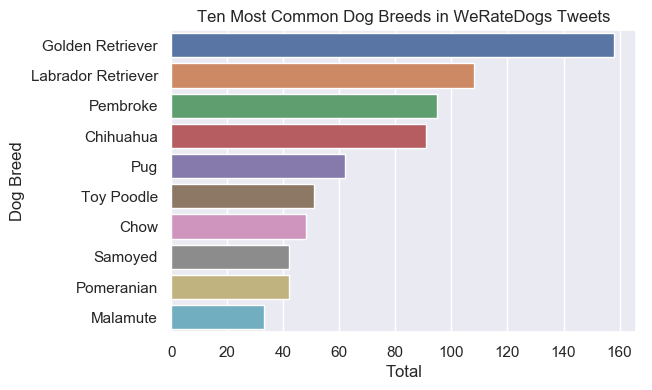

In [54]:
# Plot counts of the 10 most common dog breeds
top_breeds = (twitter_archive_master.dog_breed.value_counts()
              .head(10)
              .to_frame()
              .reset_index()
              .rename(columns={'index': 'dog_breed', 'dog_breed': 'total'}))
top_breeds['dog_breed'] = top_breeds['dog_breed'].str.title()
plt.figure(dpi=100);
ax = sns.barplot(x='total', y='dog_breed', data=top_breeds);
ax.set_title('Ten Most Common Dog Breeds in WeRateDogs Tweets');
ax.set_ylabel('Dog Breed');
ax.set_xlabel('Total');

From the plot it's clear that the Golden Retriever shows up the most often in tweets even compared to the rest of the most common dog breeds. The second most common breed, the Labrador Retriever, doesn't appear nearly as often as the Golden Retriever despite its own fairly high frequency of appearances. It's possible that the majority of the _**WeRateDogs**_ account's followers own Golden Retrievers or that they are more active than followers who own other dogs but I can't be too certain of this without conducting some sort of survey. If I assume that the followers of the _**WeRateDogs**_ account are representative of dog owners as a whole then, given the account's massive following, this could be an indication of the popularity of all of the breeds represented in the image prediction data.

### Most common dog type

Here I'll look at which of the dog labels or types (e.g., doggo, puppo, etc.) is the most common.
This will give me some idea of the ages of the dogs shown in the tweets.

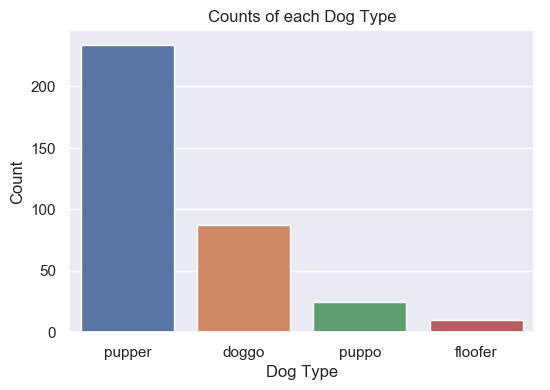

In [55]:
# Extract separate dog types
dog_type_mask = twitter_archive_master['dog_type'].notnull()
dog_type_raw = twitter_archive_master.dog_type.loc[dog_type_mask].str.split(',').tolist()
dog_type = list(map(lambda x: x.strip(), itertools.chain.from_iterable(dog_type_raw)))
dog_type = np.array(dog_type)

# Plot counts of each dog type
plot_category_order = ['pupper', 'doggo', 'puppo', 'floofer']
plt.figure(dpi=100);
ax = sns.countplot(x=dog_type, order=plot_category_order);
ax.set_title('Counts of each Dog Type');
ax.set_ylabel('Count');
ax.set_xlabel('Dog Type');

From the bar chart it would appear that the majority of the dogs displayed in the tweets are puppies. However, the combined total of all of the dog types doesn't equal the number of tweets in the dataset. In order to get a more accurate picture of the general ages of the dogs in the dataset, I'll need to include the missing values.

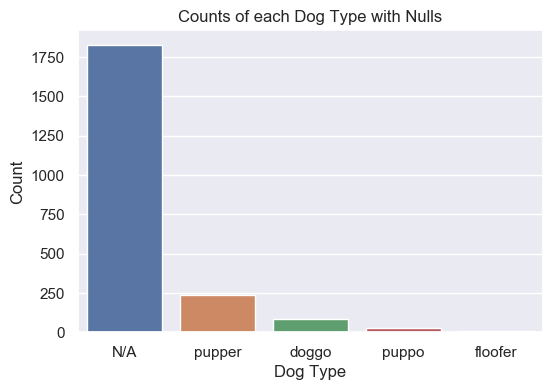

In [56]:
# Extract separate dog types with nulls
dog_type_nulls_raw = twitter_archive_master['dog_type'].fillna('N/A').str.split(',').tolist()
dog_type_nulls = list(map(lambda x: x.strip(), itertools.chain.from_iterable(dog_type_nulls_raw)))
dog_type_nulls = np.array(dog_type_nulls)

# Plot counts of each dog type with nulls
plot_category_order_nulls = ['N/A', 'pupper', 'doggo', 'puppo', 'floofer']
plt.figure(dpi=100);
ax = sns.countplot(x=dog_type_nulls, order=plot_category_order_nulls);
ax.set_title('Counts of each Dog Type with Nulls');
ax.set_ylabel('Count');
ax.set_xlabel('Dog Type');

Here it's obvious that there are far more missing values than dog types making it impossible to draw accurate conclusions about the overall ages of the dogs.

### Most common scores

I'll now take a look at the most common scores given to the dogs shown in each tweet.

In [57]:
twitter_archive_master['score'] = twitter_archive_master['rating_numerator'].astype(str) + "/" + \
                                  twitter_archive_master['rating_denominator'].astype(str)
twitter_archive_master.score.value_counts()

12/10       500
10/10       442
11/10       425
13/10       308
9/10        155
8/10         98
7/10         52
14/10        43
5/10         34
6/10         32
3/10         19
4/10         15
2/10          9
1/10          7
0/10          2
420/10        2
4/20          2
9/11          1
17/10         1
60/50         1
165/150       1
88/80         1
11.27/10      1
13.5/10       1
24/7          1
84/70         1
80/80         1
121/110       1
007/10        1
44/40         1
15/10         1
45/50         1
20/16         1
7/11          1
1/2           1
50/50         1
99/90         1
182/10        1
666/10        1
144/120       1
204/170       1
11.26/10      1
9.75/10       1
776/10        1
9.5/10        1
143/130       1
Name: score, dtype: int64

The most common score by far is 12/10 followed by 10/10 and 11/10. It's interesting to note that in these "standard" scores the numerator doesn't stray too far above the numerator. The sillier, more outlandish scores appear to be quite rare even compared to the scores where the numerator is less than the denominator. This suggests that, on the whole, _**WeRateDogs**_ regards the dogs whose pictures have been submitted to them as being worthy of praise and adulation and that the account is quite lenient in the scores it gives them.

### Total tweets per month

I'll briefly examine the overall posting behavior of the _**WeRateDogs**_ account beginning with how often the owners of the account posted a tweet each month over the almost two years the account had been active at the time the archived tweets were collected.

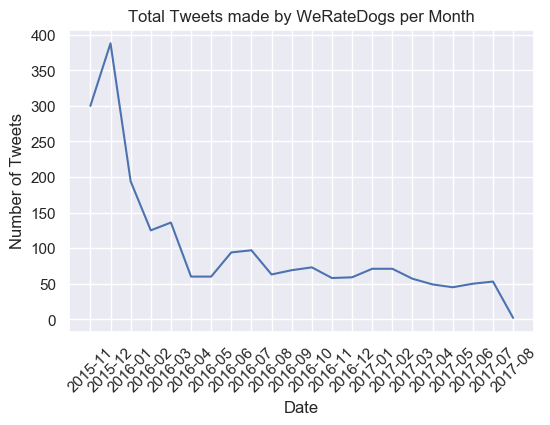

In [58]:
# Prepare tweet_archive for plotting
twitter_archive_master['year_month_date'] = twitter_archive_master['timestamp'].dt.year.astype(str) + '-' + \
                                            twitter_archive_master['timestamp'].dt.month.astype(str).str.pad(2, fillchar='0')
twitter_archive_master['is_tweet'] = np.where(twitter_archive_master.tweet_id.notnull(), 1, 0)

# Get required data from twitter_archive
twitter_archive_monthly_tweets = twitter_archive_master.groupby('year_month_date').is_tweet.sum().reset_index()

# Plot the data
plt.figure(dpi=100);
plt.xticks(rotation=45);
ax = sns.lineplot(x='year_month_date', y='is_tweet', data=twitter_archive_monthly_tweets);
ax.set_title('Total Tweets made by WeRateDogs per Month');
ax.set_xlabel('Date');
ax.set_ylabel('Number of Tweets');

From the plot it looks like the account was very active during the first two months after its creation as indicated by the sharp increase between November 2015 and December 2015. The account's posting activity began to decline at the start of 2016 and continued to do so up until the archived tweets were collected. There were, of course, months with increased activity but the overall trend was a downward one. This seems to suggest that the owners of the account may have gotten busy with other work or that they have gradually lost steam over time. I'll need a more current archive of _**WeRateDogs**_ tweets to see if this trend continues to this day or if the account's posting activity has picked up again.

### Number of replies made by WeRateDogs account

I'll end by taking a look at the replies made by the _**WeRateDogs**_ account. I'd like to know how often the owners of the account reply to tweets and to whom they reply. First, I'll get the total number of replies made by the owners of the account.

In [59]:
# Get total number of replies and total number of tweets in dataset
reply_mask = twitter_archive_master.in_reply_to_status_id.notnull()
num_replies = twitter_archive_master.in_reply_to_status_id.loc[reply_mask].unique().size
num_tweets = twitter_archive_master.shape[0]

# Print the totals
print('Total number of replies: {}'.format(num_replies))
print('Total number of tweets in cleaned dataset: {}'.format(num_tweets))

Total number of replies: 76
Total number of tweets in cleaned dataset: 2174


The total number of replies compared to the total number of tweets in the cleaned dataset implies that the owners of the _**WeRateDogs**_ account rarely reply to tweets. To get an idea of the kind of people the owners of the account reply to I'll extract the Twitter handles of these tweets.

In [60]:
# Get Twitter handles of the tweets that WeRateDogs has replied to
replied_users = twitter_archive_master.text.loc[reply_mask].str.extract('@(?P<replied_user>.*?)(?:(\b|\s|$))')
replied_users.replied_user.value_counts()

markhoppus         2
NBCSports          1
Marc_IRL           1
roushfenway        1
ABC                1
UNC                1
breaannanicolee    1
CommonWhiteGirI    1
dhmontgomery       1
HistoryInPics      1
mount_alex3        1
JODYHiGHROLLER     1
LightningHoltt     1
spaghemily         1
NonWhiteHat        1
wane15             1
TheEllenShow       1
SkyWilliams        1
shibbnbot          1
jonnysun           1
s8n                1
RealKentMurphy     1
0_kelvin_0         1
ABC7               1
bragg6of8          1
xianmcguire        1
ComplicitOwl       1
serial             1
Jack_Septic_Eye    1
imgur              1
Name: replied_user, dtype: int64

In [61]:
# See if the number of Twitter handles matches the number of unique user IDs
user_id_tot = twitter_archive_master.in_reply_to_user_id.loc[reply_mask].unique().size
twitter_handle_tot = replied_users.replied_user.value_counts().size

print('Number of user IDs: {}'.format(user_id_tot))
print('Number of Twitter handles: {}'.format(twitter_handle_tot))

Number of user IDs: 30
Number of Twitter handles: 30


From the list of Twitter handles I can see that there are quite a lot of big names. At the very least, the majority of these accounts have a fairly large twitter following. The fact that the number of Twitter handles matches the number of user IDs implies that most of the replies from the _**WeRateDogs**_ account are directed at the accounts with these Twitter handles even if they haven't been explicitly mentioned in the tweet. All of this tells me that, when _**WeRateDogs**_ does reply to a tweet the tweets tend to come from the more popular Twitter accounts.